In [1]:
#Importing all the necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#Loading the csv file into a pandas dataframe
df=pd.read_csv("C:\\Users\\ritik\\Desktop\\MIT YEAR 3\\5th Sem\\B.Tech 5th sem Honours miniproject\\pd_speech_features.csv",skiprows=1)

In [3]:
df.shape

(756, 755)

In [4]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [6]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
#Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [8]:
#Aggregating the duplicate rows
df=df.groupby('id').mean().reset_index()
df.drop("id",axis=1,inplace=True)

In [9]:
#Correlation matrix
corr_matrix = df.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                              gender       PPE       DFA      RPDE  numPulses  \
gender                     1.000000  0.014374  0.104643  0.182123  -0.509785   
PPE                        0.014374  1.000000 -0.113344 -0.474091   0.213316   
DFA                        0.104643 -0.113344  1.000000  0.171102  -0.296987   
RPDE                       0.182123 -0.474091  0.171102  1.000000  -0.556395   
numPulses                 -0.509785  0.213316 -0.296987 -0.556395   1.000000   
...                             ...       ...       ...       ...        ...   
tqwt_kurtosisValue_dec_33  0.131868  0.059702 -0.030422 -0.109201  -0.079303   
tqwt_kurtosisValue_dec_34  0.163985  0.081546  0.066398 -0.039366  -0.101547   
tqwt_kurtosisValue_dec_35  0.135109  0.077205  0.096407 -0.019258  -0.095644   
tqwt_kurtosisValue_dec_36  0.121971  0.075091  0.144736  0.037335  -0.080576   
class                      0.182713 -0.103041  0.322357  0.267733  -0.302712   

                  

In [10]:
#this is to remove highly correlated columns to reduce the feature space 
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue
 
    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue
 
        val = df[col].corr(df[col1])
 
        if val > 0.7: 
            columns.remove(col1)  #removes columns if correlation is more than 0.7
            continue
        else:
            filtered_columns.append(col1)
 
    df = df[filtered_columns]

In [11]:
df.shape

(252, 287)

In [12]:
#Feature selection to select the 30 most relevant features
X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape


C:\Users\ritik\AppData\Local\Temp\ipykernel_6408\3084947170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = df['class']


(252, 31)

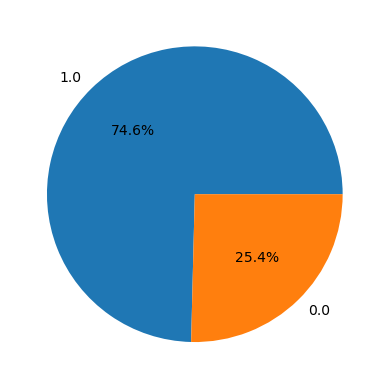

In [13]:
#To check for imbalanced dataset
x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

In [14]:
features = df.drop('class', axis=1)
target = df['class']
#the dataset is being split into training and validation data
#20% of the dataset is used for validation and 80% for training
X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.2,random_state=10)
X_train.shape, X_val.shape

((201, 30), (51, 30))

In [15]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape

((302, 30), (302,))

LOGISTIC REGRESSION

In [16]:
lr=LogisticRegression()
lr.fit(X, Y)
    
print('Logistic Regression :')
    
# Predict probabilities for training set
train_preds = lr.predict_proba(X)[:, 1]
print('Training Accuracy (ROC AUC):', ras(Y, train_preds))
   
# Predict probabilities for validation set
val_preds_prob = lr.predict_proba(X_val)[:, 1]
print('Validation Accuracy (ROC AUC):', ras(Y_val, val_preds_prob))

#Get the F1 Score
val_preds=lr.predict(X_val)
lr_f1=f1_score(Y_val,val_preds)
print('F1 Score:', lr_f1)

#Get the accuracy
lr_acc=accuracy_score(Y_val,val_preds)
print('Accuracy:', lr_acc)

#Get the precision
lr_pre=precision_score(Y_val,val_preds)
print('Precision:', lr_pre)

#Get the recall
lr_rec=recall_score(Y_val,val_preds)
print('Recall:', lr_rec)


Logistic Regression :
Training Accuracy (ROC AUC): 0.8293057322047279
Validation Accuracy (ROC AUC): 0.8146718146718146
F1 Score: 0.9210526315789473
Accuracy: 0.8823529411764706
Precision: 0.8974358974358975
Recall: 0.9459459459459459


C:\Users\ritik\anaconda3\envs\learnPandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


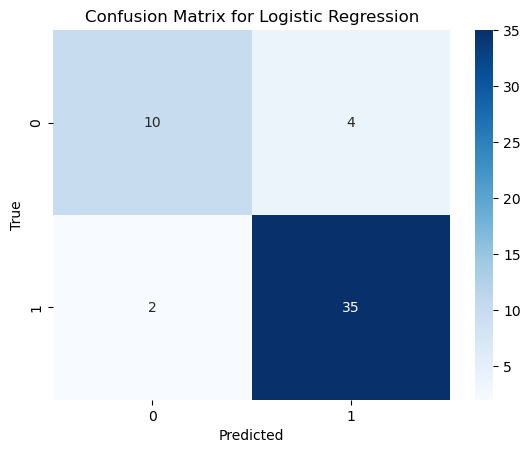

In [17]:
# Compute confusion matrix
cm = confusion_matrix(Y_val, lr.predict(X_val))

# Plot using seaborn heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [18]:
print('Classification report for Logistic Regression:')
print(metrics.classification_report(Y_val, lr.predict(X_val)))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        14
         1.0       0.90      0.95      0.92        37

    accuracy                           0.88        51
   macro avg       0.87      0.83      0.85        51
weighted avg       0.88      0.88      0.88        51



In [19]:
svc=SVC(kernel='rbf', probability=True)
svc.fit(X, Y)
    
print('Support vector classifier (SVC) :')
    
# Predict probabilities for training set 
train_preds = svc.predict_proba(X)[:, 1]
print('Training Accuracy (ROC AUC):', ras(Y, train_preds))
   
# Predict probabilities for validation set
val_preds = svc.predict_proba(X_val)[:, 1]
print('Validation Accuracy (ROC AUC):', ras(Y_val, val_preds_prob))

#Get the F1 Score
val_preds=svc.predict(X_val)
svc_f1=f1_score(Y_val,val_preds)
print('F1 Score:', svc_f1)

#Get the accuracy
svc_acc=accuracy_score(Y_val,val_preds)
print('Accuracy:', svc_acc)

#Get the precision
svc_pre=precision_score(Y_val,val_preds)
print('Precision:', svc_pre)

#Get the recall
svc_rec=recall_score(Y_val,val_preds)
print('Recall:', svc_rec)

Support vector classifier (SVC) :
Training Accuracy (ROC AUC): 0.7104512959957897
Validation Accuracy (ROC AUC): 0.8146718146718146
F1 Score: 0.7272727272727273
Accuracy: 0.6470588235294118
Precision: 0.8275862068965517
Recall: 0.6486486486486487


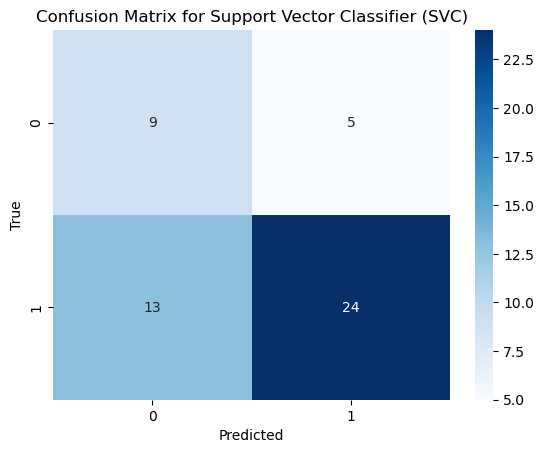

In [20]:
# Compute confusion matrix
cm = confusion_matrix(Y_val, svc.predict(X_val))

# Plot using seaborn heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Support Vector Classifier (SVC)')
plt.show()

In [21]:
print('Classification report for Support Vector Classifier (SVC):')
print(metrics.classification_report(Y_val, svc.predict(X_val)))

Classification report for Support Vector Classifier (SVC):
              precision    recall  f1-score   support

         0.0       0.41      0.64      0.50        14
         1.0       0.83      0.65      0.73        37

    accuracy                           0.65        51
   macro avg       0.62      0.65      0.61        51
weighted avg       0.71      0.65      0.66        51



K NEAREST NEIGHBOURS CLASSIFIER (KNN)

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)

print('K Nearest Neighbours classifier (KNN) :')
    
# Predict probabilities for training set 
train_preds = knn.predict_proba(X)[:, 1]
print('Training Accuracy (ROC AUC):', ras(Y, train_preds))
   
# Predict probabilities for validation set
val_preds = knn.predict_proba(X_val)[:, 1]
print('Validation Accuracy (ROC AUC):', ras(Y_val, val_preds_prob))

#Get the F1 Score
val_preds=knn.predict(X_val)
knn_f1=f1_score(Y_val,val_preds)
print('F1 Score:', knn_f1)

#Get the accuracy
knn_acc=accuracy_score(Y_val,val_preds)
print('Accuracy:', knn_acc)

#Get the precision
knn_pre=precision_score(Y_val,val_preds)
print('Precision:', knn_pre)

#Get the recall
knn_rec=recall_score(Y_val,val_preds)
print('Recall:', knn_rec)

K Nearest Neighbours classifier (KNN) :
Training Accuracy (ROC AUC): 0.9296302793737117
Validation Accuracy (ROC AUC): 0.8146718146718146
F1 Score: 0.7428571428571429
Accuracy: 0.6470588235294118
Precision: 0.7878787878787878
Recall: 0.7027027027027027


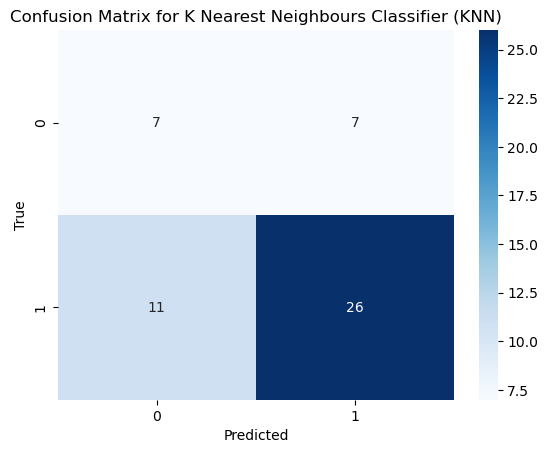

In [23]:
# Compute confusion matrix
cm = confusion_matrix(Y_val, knn.predict(X_val))

# Plot using seaborn heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for K Nearest Neighbours Classifier (KNN)')
plt.show()

In [24]:
print('Classification report for K Nearest Neighbours classifier (KNN):')
print(metrics.classification_report(Y_val, knn.predict(X_val)))

Classification report for K Nearest Neighbours classifier (KNN):
              precision    recall  f1-score   support

         0.0       0.39      0.50      0.44        14
         1.0       0.79      0.70      0.74        37

    accuracy                           0.65        51
   macro avg       0.59      0.60      0.59        51
weighted avg       0.68      0.65      0.66        51



GAUSSIAN NAIVE BAYES (GNB)

In [25]:
gnb=GaussianNB()
gnb.fit(X,Y)

print('Gaussian Naive Bayes classifier (GNB) :')
    
# Predict probabilities for training set
train_preds = gnb.predict_proba(X)[:, 1]
print('Training Accuracy (ROC AUC):', ras(Y, train_preds))

# Predict probabilities for validation set
val_preds = gnb.predict_proba(X_val)[:, 1]
print('Validation Accuracy (ROC AUC):', ras(Y_val, val_preds_prob))

#Get F1 Score
val_preds=gnb.predict(X_val)
gnb_f1=f1_score(Y_val,val_preds)
print('F1 Score:', gnb_f1)

#Get the accuracy
gnb_acc=accuracy_score(Y_val,val_preds)
print('Accuracy:', gnb_acc)

#Get the precision
gnb_pre=precision_score(Y_val,val_preds)
print('Precision:', gnb_pre)

#Get the recall
gnb_rec=recall_score(Y_val,val_preds)
print('Recall:', gnb_rec)

Gaussian Naive Bayes classifier (GNB) :
Training Accuracy (ROC AUC): 0.8476382614797596
Validation Accuracy (ROC AUC): 0.8146718146718146
F1 Score: 0.8860759493670886
Accuracy: 0.8235294117647058
Precision: 0.8333333333333334
Recall: 0.9459459459459459


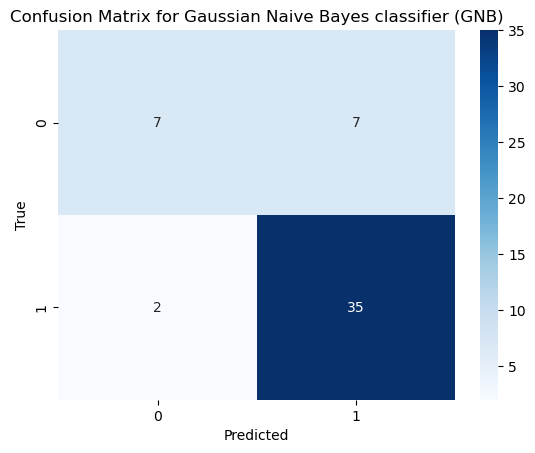

In [26]:
# Compute confusion matrix
cm = confusion_matrix(Y_val, gnb.predict(X_val))

# Plot using seaborn heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gaussian Naive Bayes classifier (GNB)')
plt.show()

In [27]:
print('Classification report for Gaussian Naive Bayes classifier (GNB):')
print(metrics.classification_report(Y_val, gnb.predict(X_val)))

Classification report for Gaussian Naive Bayes classifier (GNB):
              precision    recall  f1-score   support

         0.0       0.78      0.50      0.61        14
         1.0       0.83      0.95      0.89        37

    accuracy                           0.82        51
   macro avg       0.81      0.72      0.75        51
weighted avg       0.82      0.82      0.81        51



BAR GRAPH SHOWING THE F1 SCORE OF THE MODELS USED

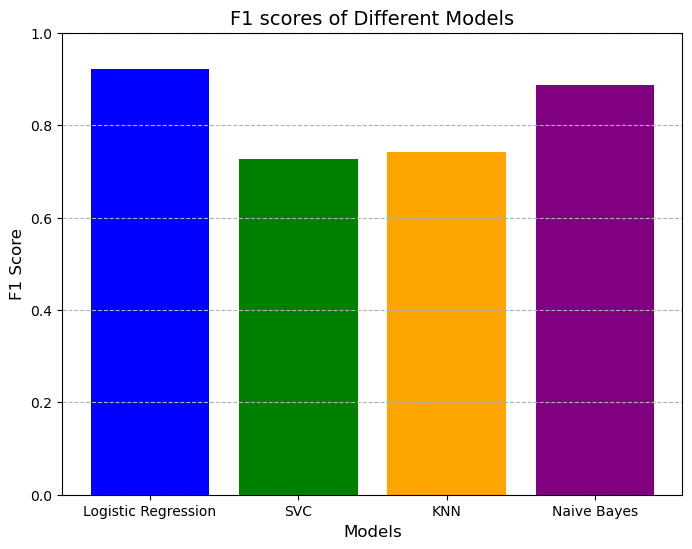

In [28]:
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Naive Bayes']
f1_scores = [lr_f1,svc_f1,knn_f1,gnb_f1]  

plt.figure(figsize=(8, 6))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 scores of Different Models', fontsize=14)
plt.ylim(0, 1)  # Set y-axis range to 0-1 for percentage scale
plt.grid(axis='y', linestyle='--')

plt.show()


BAR GRAPH SHOWING THE ACCURACY OF THE MODELS USED

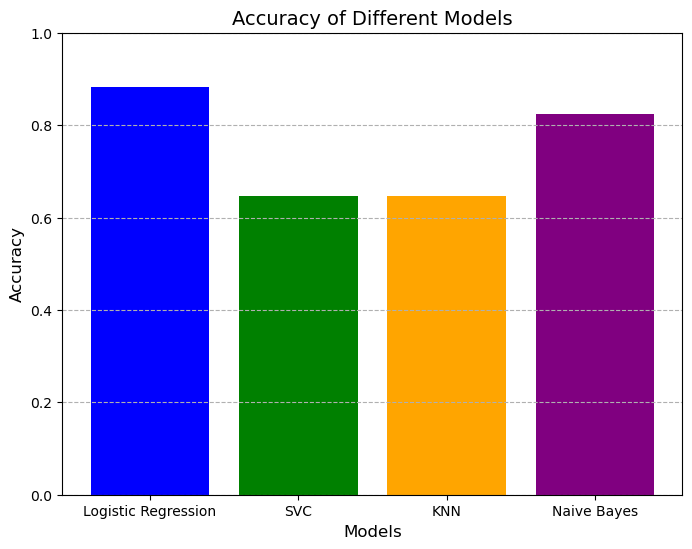

In [29]:
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Naive Bayes']
accuracies = [lr_acc,svc_acc,knn_acc,gnb_acc]  

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Different Models', fontsize=14)
plt.ylim(0, 1)  # Set y-axis range to 0-1 for percentage scale
plt.grid(axis='y', linestyle='--')

plt.show()

BAR GRAPH SHOWING THE PRECISION OF THE MODELS USED

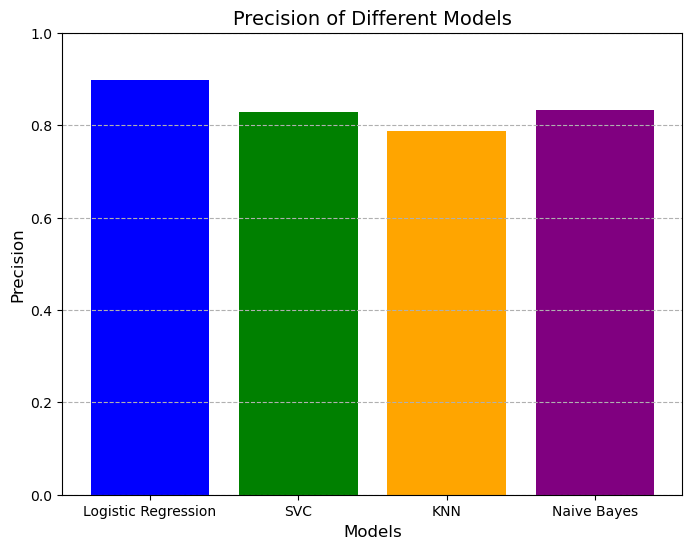

In [30]:
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Naive Bayes']
precision = [lr_pre,svc_pre,knn_pre,gnb_pre]  

plt.figure(figsize=(8, 6))
plt.bar(model_names, precision, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision of Different Models', fontsize=14)
plt.ylim(0, 1)  # Set y-axis range to 0-1 for percentage scale
plt.grid(axis='y', linestyle='--')

plt.show()

BAR GRAPH SHOWING THE RECALL OF THE MODELS USED

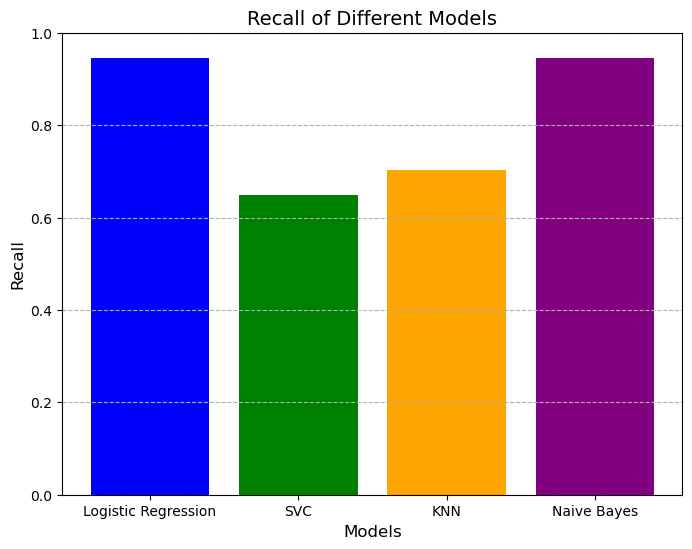

In [31]:
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Naive Bayes']
recalls = [lr_rec,svc_rec,knn_rec,gnb_rec]  

plt.figure(figsize=(8, 6))
plt.bar(model_names, recalls, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Recall of Different Models', fontsize=14)
plt.ylim(0, 1)  # Set y-axis range to 0-1 for percentage scale
plt.grid(axis='y', linestyle='--')

plt.show()

The following conclusions can be made based on the above graphs and values:


a)Logistic regression has the highest accuracy(0.88), precision(0.90) and F1 Score(0.92).

b)Logistic regression and naive bayes have the same recall value (0.95)

c)Based on the above observations Logistic Regression can be said to be well-suited for early detection of Parkinson's Disease from speech features.

d)The second best is the naive bayes model which is followed by K Nearest neighbours and the least is Support vector machine. Although it can be observed that the evaluation metrics of the KNN model and the SVC model are more or less similar.